# Interactive request examples 

In [4]:
import PIL.Image
import sys
import io
from requests import request

In [5]:
img = PIL.Image.open('D:/Projects/Project_coding/Python/pabd_cv/data/dog.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [5]:
buffer = io.BytesIO()
img.save(buffer, format='JPEG')

with buffer as buf:
    buffer.seek(0)
    response = request('POST', 'http://localhost:5000/classify', data=buf)

response.content

ConnectionError: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /classify (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000237B361B358>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))

## Pytorch model examples

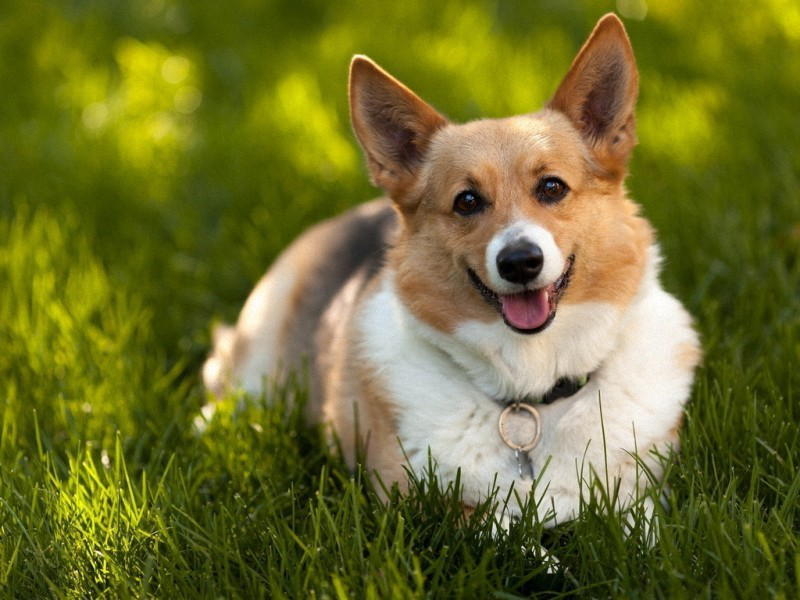

In [6]:
img

In [1]:
import json
import tensorflow as tf
import numpy as np
# from torchvision.transforms.functional import pil_to_tensor
# from torchvision.models import resnet101, ResNet101_Weights

In [2]:
resnet = tf.keras.applications.ResNet101()

179648224/179648224 [==============================] - 43s 0us/step


In [17]:
img_t = tf.convert_to_tensor(
    img, dtype=None, dtype_hint=None, name=None)
img_t = tf.expand_dims(img_t, axis=0)
img_t = tf.image.resize(img_t, (224, 224))

In [18]:
%%time
out = resnet(img_t)

Wall time: 556 ms


In [19]:
idxs = tf.argsort(out)[0][:3]

In [21]:
idxs.numpy()

array([ 81,  22, 956])

In [32]:
with open('D:/Projects/Project_coding/Python/pabd_cv/data/imgnet_cats_en.txt') as f:
    cats = f.readlines()

cats_ru = [s.rstrip() for s in cats]

In [33]:
len(cats_ru)

1000

In [34]:
[cats_ru[int(i)] for i in idxs]

['partridge', 'bald eagle', 'apple custard']